# **RL assignment**
#### **Darido - Serilli**

In [18]:
import gym.spaces
import numpy as np
import random
import matplotlib.pyplot as plt 

In [19]:
env = gym.make("Taxi-v3")

state_space = env.observation_space.n
action_space = env.action_space.n

qtable = np.zeros((state_space, action_space))

In [20]:
def play(rnd = False, 
         epsilon = 1.0, 
         epsilon_min = 0.005, 
         epsilon_decay = 0.99993, 
         episodes = 50000, 
         max_steps = 100, 
         learning_rate = 0.65, 
         gamma = 0.65):
    
    scores = []
    for episode in range(episodes):

        # Reset the game state, done and score before every episode/game
        state = env.reset() #Gets current game state
        done = False        #decides whether the game is over
        score = 0

        for _ in range(max_steps):

            # With the probability of (1 - epsilon) take the best action in our Q-table
            if random.uniform(0, 1) > epsilon:
                action = np.argmax(qtable[state, :])
            # Else take a random action
            else:
                action = env.action_space.sample()

            # Step the game forward
            next_state, reward, done, _ = env.step(action)

            # Add up the score
            score += reward

            # Update our Q-table with our Q-function
            qtable[state, action] = (1 - learning_rate) * qtable[state, action] \
                + learning_rate * (reward + gamma * np.max(qtable[next_state,:]))

            # Set the next state as the current state
            state = next_state

            if done:
                break

        if(not rnd):
            # Reducing our epsilon each episode (Exploration-Exploitation trade-off)
            if epsilon >= epsilon_min:
                epsilon *= epsilon_decay

        scores.append(score)
        
    return scores

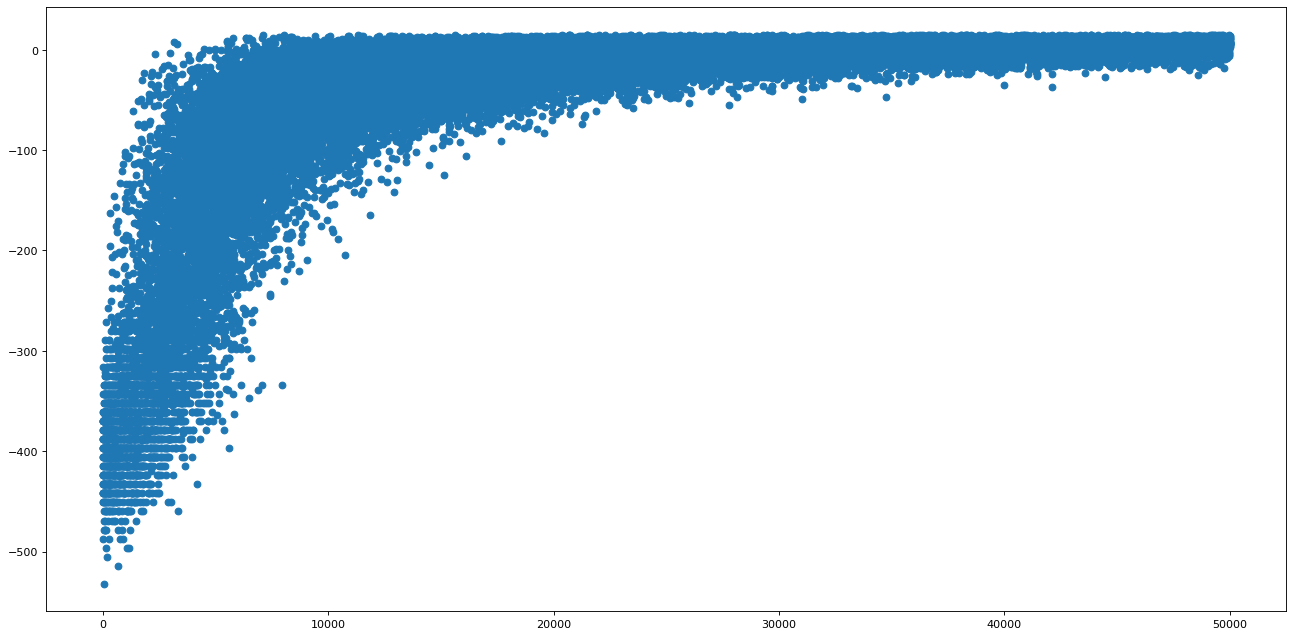

In [16]:
## Play with learning
scores = play()

plt.figure(figsize=(20, 10), dpi=80)
plt.xlabel('episode') 
plt.ylabel('score') 
plt.scatter([x for x in range(episodes)], scores)
plt.show()

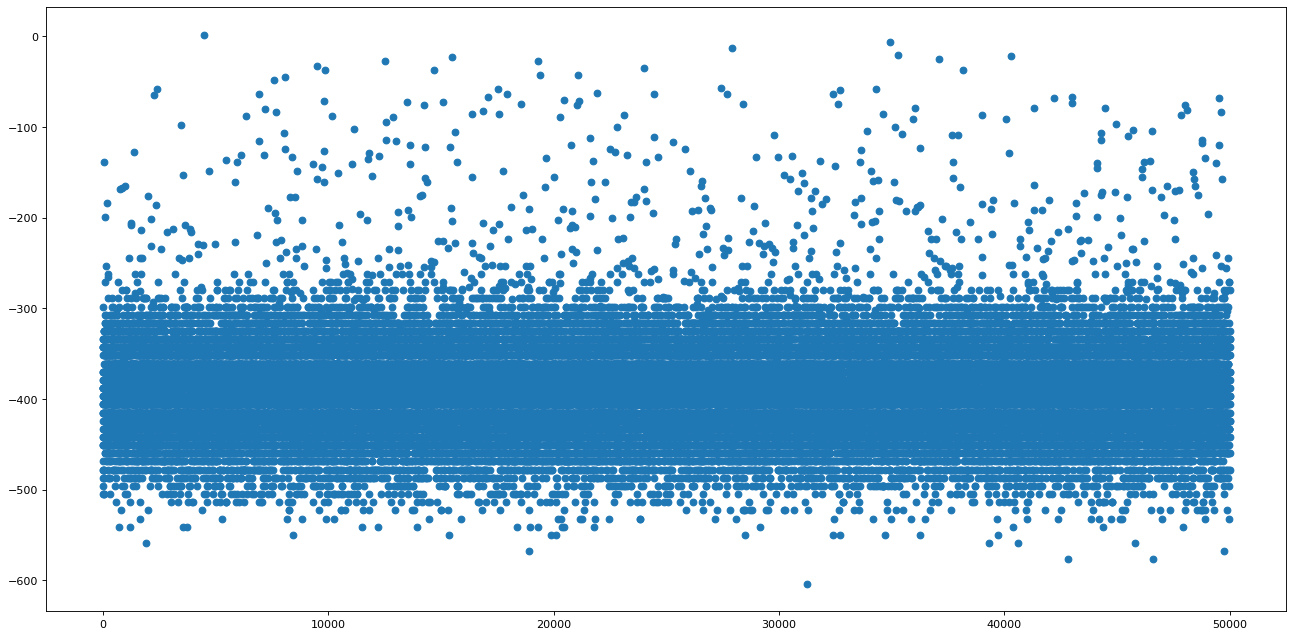

In [21]:
## Play without learning 
rnd_scores = play(rnd = True)

plt.figure(figsize=(20, 10), dpi=80)
plt.xlabel('episode') 
plt.ylabel('score') 
plt.scatter([x for x in range(episodes)], rnd_scores)